In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

In [60]:
# Import data of single runs 
data = pd.read_feather("sampling_base")
input_vars = pd.read_csv("input_parameters.csv")

# Import data of batch runs
data_batch = pd.read_feather("sampling_base_batch")
input_vars_batch = pd.read_csv("input_parameters_batch.csv")

# Supporting functions
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

## Unsatisfied consumption

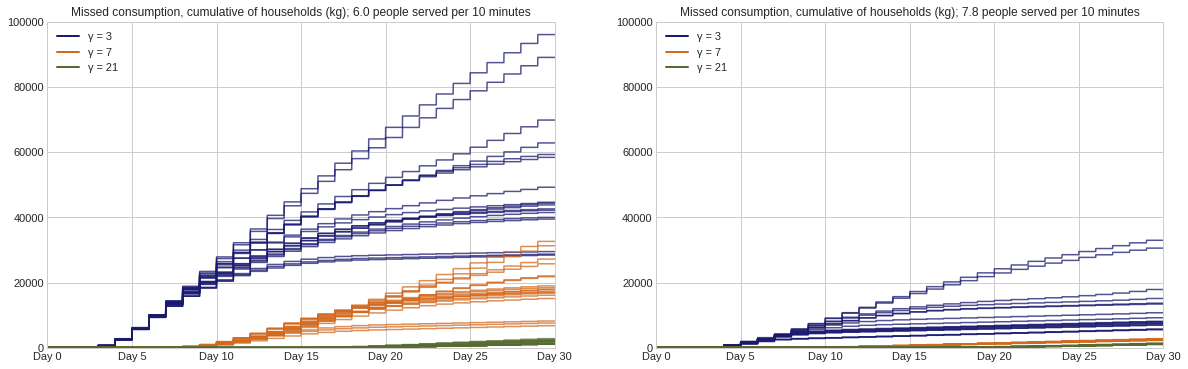

In [19]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['midnightblue', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

for i in d:    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            #ax[0].plot( x, data.o1[data.o0==j],color='lightgrey', alpha=0.2)
            ax[0].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[0].set_title("Missed consumption, cumulative of households (kg); 6.0 people served per 10 minutes")
            
        else:
            ax[1].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[1].set_title("Missed consumption, cumulative of households (kg); 7.8 people served per 10 minutes")
      
for a in ax:
    a.set_xticks(ticks_labels(5)[0])
    a.set_xticklabels(ticks_labels(5)[1])
    a.set_xlim([0,4320])
    a.set_ylim([-200,100000])
    a.legend(lines, labels,loc='upper left')

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

### Clusterplot for sc=7.8 and gamma=3

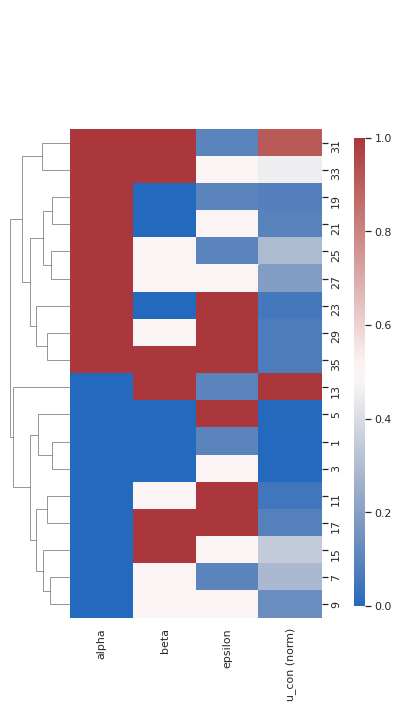

In [531]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==3].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,10),col_cluster=False,cmap='vlag')
fig.savefig("/home/daan/Desktop/clustermap_uc_g3sc78.png")

### Clusterplot for sc=7.8 and gamma=7

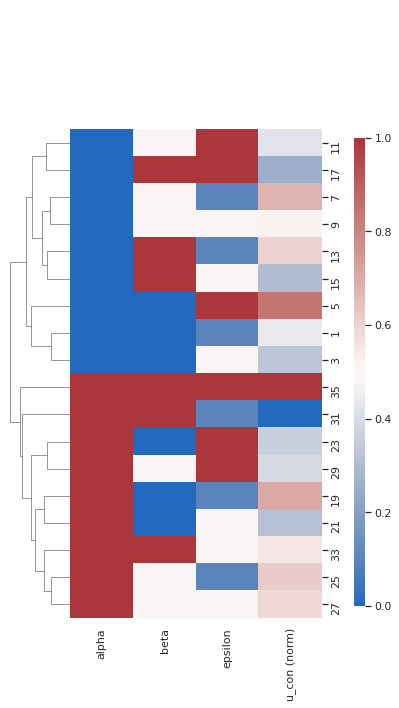

In [534]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,10),col_cluster=False,cmap='vlag')
fig.savefig("/home/daan/Desktop/clustermap_uc_g7sc78.png")

### Clusterplot for sc=6.0 and gamma=7

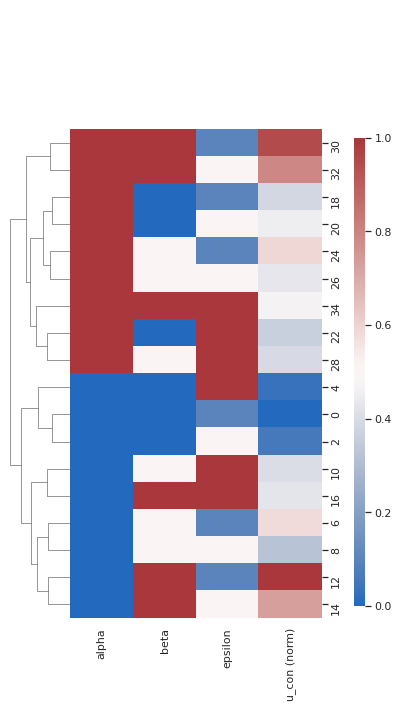

In [76]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["u_con (norm)"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,10),col_cluster=False,cmap='vlag')
fig.savefig("/home/daan/Desktop/clustermap_uc_g7sc6.0.png")

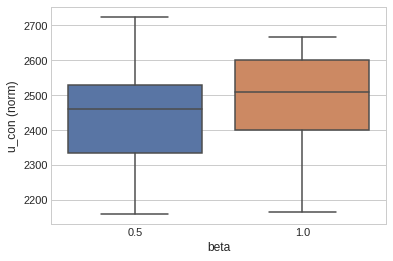

In [71]:
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()

for j in input_vars_batch.index:
    uc_endvals_dict["u_con (norm)"].append(data_batch.o1[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.gamma==7]
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==7.8]

ax = sns.boxplot(x="beta", y="u_con (norm)", data=input_vars_batch_filtered)

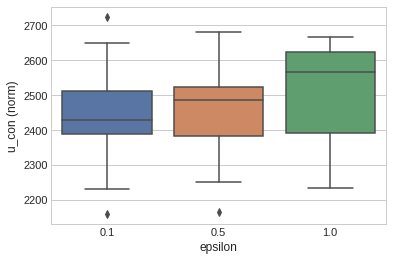

In [72]:
ax = sns.boxplot(x="epsilon", y="u_con (norm)", data=input_vars_batch_filtered)

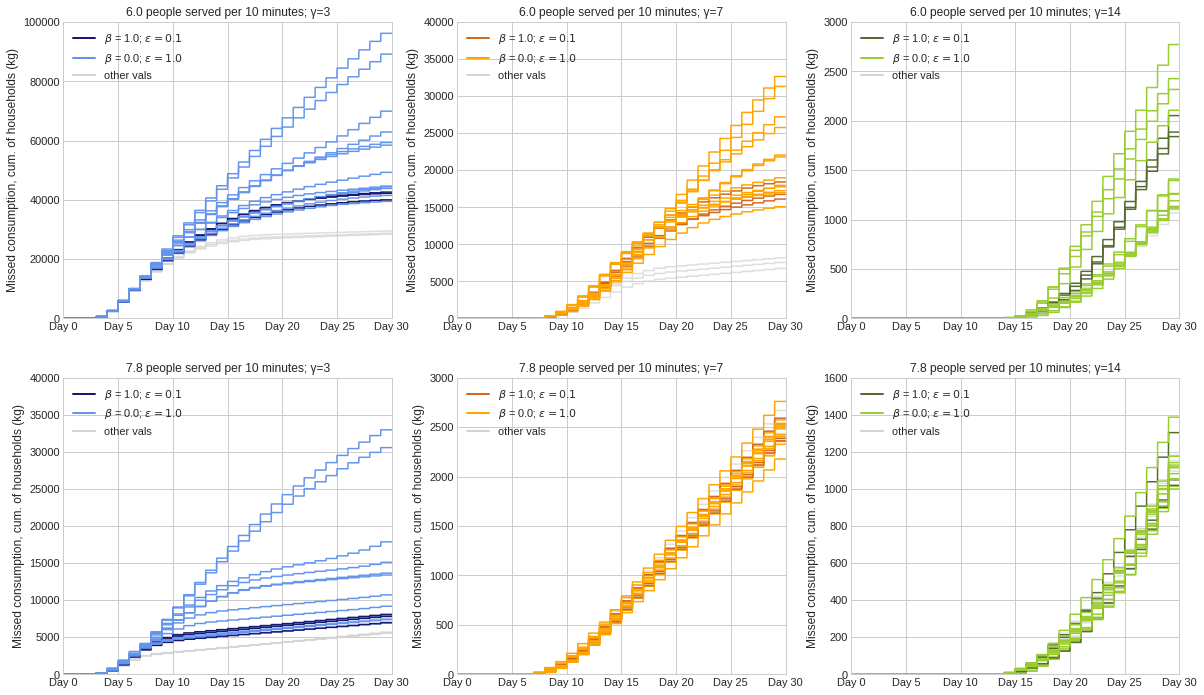

In [62]:
sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

# x vector to plot            
x = np.linspace(0,4319,4320) 

fig, ax = plt.subplots(2,3,figsize=(20,12))
        
colors = {}

colors[0] = ['midnightblue','cornflowerblue','lightgrey']
colors[1] = ['chocolate','orange','lightgrey']
colors[2] = ['darkolivegreen','yellowgreen','lightgrey']

combinations = {}
combinations[6.0] = 0
combinations[7.8] = 1

for i in d:
    for a in ax[:,i]:
        a.set_xlim([0,4320])
        a.set_ylabel("Missed consumption, cum. of households (kg)")
        a.set_xticks(ticks_labels(5)[0])
        a.set_xticklabels(ticks_labels(5)[1])

    for j in d[i]:
        
        if (input_vars.beta[j]==0.0 and input_vars.alpha[j]==1.0):# and input_vars.epsilon[j] != 1.0):# and input_vars.epsilon[j] ==0.1):# or (input_vars.epsilon[j] == 0.5 and input_vars.beta[j]==0.5) :
            ax[combinations[input_vars.parallel_served_full[j]],i].plot( x, data.o1[data.o0==j],color=colors[i][0])
        elif(input_vars.beta[j]>0.0):# and input_vars.epsilon[j] == 1.0):
            ax[combinations[input_vars.parallel_served_full[j]],i].plot( x, data.o1[data.o0==j],color=colors[i][1])
        else:
            ax[combinations[input_vars.parallel_served_full[j]],i].plot( x, data.o1[data.o0==j],color=colors[i][2], alpha=.75)
            
ax[0,0].set_ylim([0,100000])
ax[0,1].set_ylim([0,40000])
ax[0,2].set_ylim([0,3000])
ax[1,0].set_ylim([0,40000])
ax[1,1].set_ylim([0,3000])
ax[1,2].set_ylim([0,1600])

for g in range(3):
    gammas = [3,7,14]
    lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors[g]]
    
    labels = [r'$\beta$ = 1.0; $\epsilon=0.1$',
              r'$\beta$ = 0.0; $\epsilon=1.0$',
              'other vals']
    ax[0,g].set_title("6.0 people served per 10 minutes; γ=%s"%gammas[g])
    ax[0,g].set_title("6.0 people served per 10 minutes; γ=%s"%gammas[g])
    ax[1,g].set_title("7.8 people served per 10 minutes; γ=%s"%gammas[g])
    ax[1,g].set_title("7.8 people served per 10 minutes; γ=%s"%gammas[g])
    ax[0,g].legend(lines,labels)
    ax[1,g].legend(lines,labels)
# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

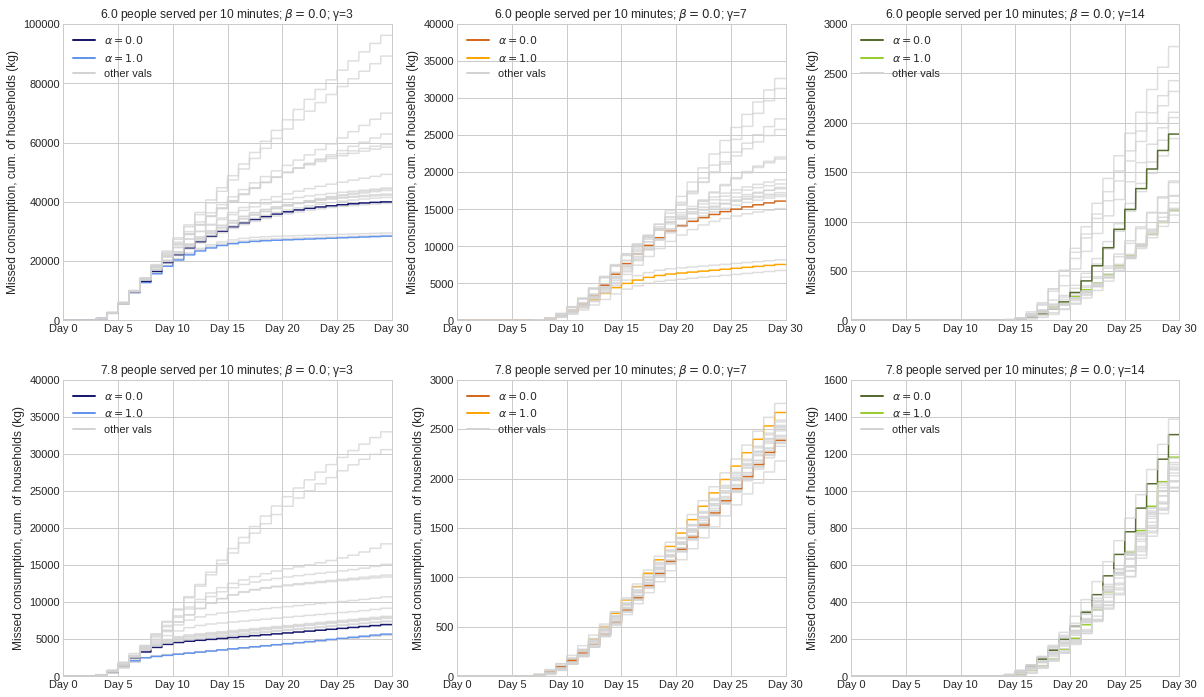

In [441]:
# x vector to plot            
x = np.linspace(0,4319,4320) 
sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(2,3,figsize=(20,12))

# Zoom for 2nd graph
# ax[1].set_ylim([-100,8000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

colors = {}

colors = ['midnightblue', 'chocolate', 'darkolivegreen']
colors[0] = ['midnightblue','cornflowerblue','lightgrey']
colors[1] = ['chocolate','orange','lightgrey']
colors[2] = ['darkolivegreen','yellowgreen','lightgrey']


combinations = {}
combinations[6.0] = 0
combinations[7.8] = 1

for i in d:
    for a in ax[:,i]:
        a.set_xlim([0,4320])
        a.set_ylabel("Missed consumption, cum. of households (kg)")
        a.set_xticks(ticks_labels(5)[0])
        a.set_xticklabels(ticks_labels(5)[1])
    
    for j in d[i]:
        if (input_vars.beta[j] ==0.0 and input_vars.alpha[j]==1.0 and input_vars.epsilon[j]==0.1):# or (input_vars.epsilon[j] == 0.5 and input_vars.beta[j]==0.5) :
            ax[combinations[input_vars.parallel_served_full[j]],i].plot( x, data.o1[data.o0==j],color=colors[i][0])
        elif(input_vars.alpha[j]==0.0 and input_vars.beta[j] == 0.0 and input_vars.epsilon[j]==0.1):
            ax[combinations[input_vars.parallel_served_full[j]],i].plot( x, data.o1[data.o0==j],color=colors[i][1])
        else:
            ax[combinations[input_vars.parallel_served_full[j]],i].plot( x, data.o1[data.o0==j],color=colors[i][2], alpha=.75)
                
ax[0,0].set_ylim([0,100000])
ax[0,1].set_ylim([0,40000])
ax[0,2].set_ylim([0,3000])
ax[1,0].set_ylim([0,40000])
ax[1,1].set_ylim([0,3000])
ax[1,2].set_ylim([0,1600])

for g in range(3):
    gammas = [3,7,14]
    lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors[g]]
    
    labels = [r'γ = %s; $\beta=0.0$; $\alpha$ = 0.0'%gammas[g],
              r'γ = %s; $\beta=0.0$; $\alpha$ = 1.0'%gammas[g],
              'γ = %s; other vals'%gammas[g]]

    ax[0,g].legend(lines,labels)
    ax[1,g].legend(lines,labels)
    
for g in range(3):
    gammas = [3,7,14]
    lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors[g]]
    
    labels = [r'$\alpha = 0.0$',
              r'$\alpha = 1.0$',
              'other vals']
    
    ax[0,g].set_title(r"6.0 people served per 10 minutes; $\beta=0.0$; γ=%s"%gammas[g])
    ax[0,g].set_title(r"6.0 people served per 10 minutes; $\beta=0.0$; γ=%s"%gammas[g])
    ax[1,g].set_title(r"7.8 people served per 10 minutes; $\beta=0.0$; γ=%s"%gammas[g])
    ax[1,g].set_title(r"7.8 people served per 10 minutes; $\beta=0.0$; γ=%s"%gammas[g])
    
    ax[0,g].legend(lines,labels)
    ax[1,g].legend(lines,labels)
# for a in ax:
#     a.set_ylabel("Cumulative unsatisfied consumption (kg)")
#     a.set_xlabel("Tick (10 min)")
#     a.set_xlim([0,4320])
#     a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

## Food waste

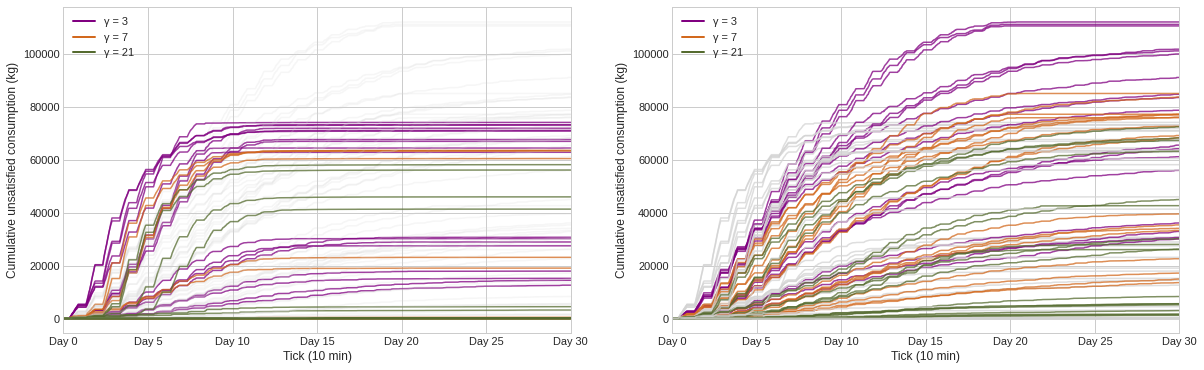

In [349]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

for i in d:    
    
    for a in ax:
        a.set_xlim([0,4320])
        a.set_ylabel("Missed consumption, cum. of households (kg)")
        a.set_xticks(ticks_labels(5)[0])
        a.set_xticklabels(ticks_labels(5)[1])
    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, data.o2[data.o0==j],color=colors[i], alpha=.75)
            
        else:
            ax[0].plot( x, data.o2[data.o0==j],color=colors[i], alpha=.75)
            ax[1].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

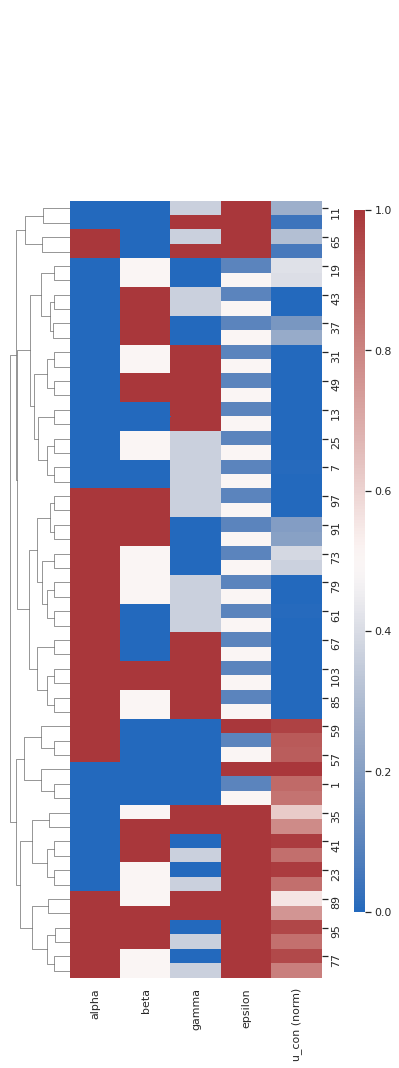

In [73]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:
    uc_endvals_dict["u_con (norm)"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 

filtered_input_vars["u_con (norm)"] = normalise(filtered_input_vars["u_con (norm)"]) 
filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 

# filtered_input_vars["parallel_served_full"] = normalise(filtered_input_vars["parallel_served_full"]) 
# filtered_input_vars["beta"] = np.abs(filtered_input_vars["beta"]-1)

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,9,10,13]],cbar_pos=(1.0, .15, .03, .65),figsize=(5,15),col_cluster=False,cmap='vlag')
fig.savefig("/home/daan/Desktop/clustermap_uc_g7sc78.png")

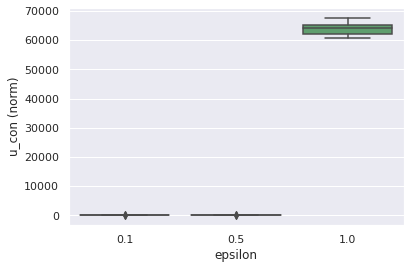

In [75]:
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()

for j in input_vars_batch.index:
    uc_endvals_dict["u_con (norm)"].append(data_batch.o2[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.gamma==7]
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==7.8]

ax = sns.boxplot(x="epsilon", y="u_con (norm)", data=input_vars_batch_filtered)

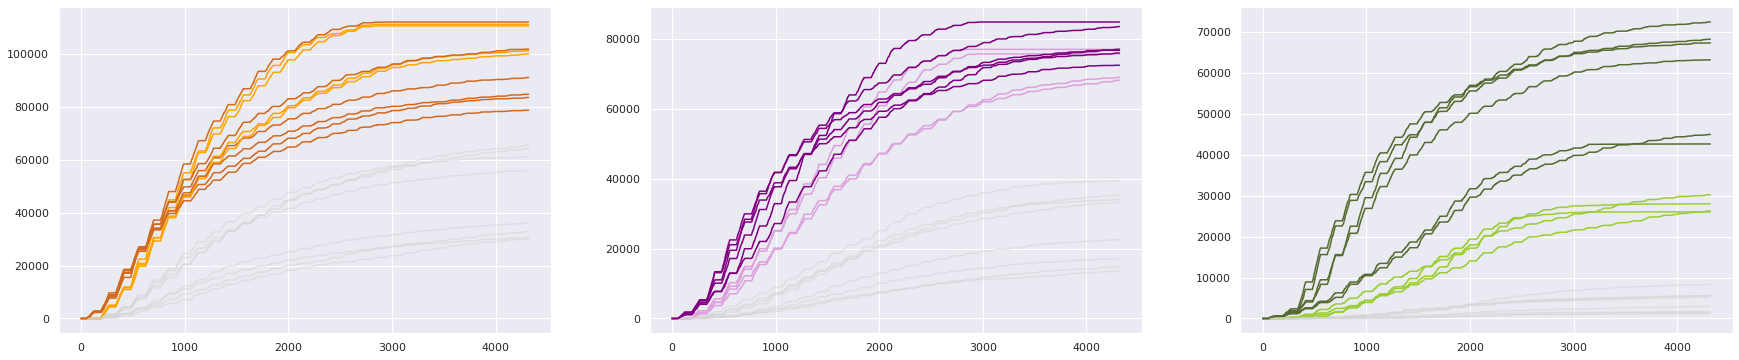

In [479]:
# x vector to plot            
x = np.linspace(0,4319,4320) 

fig, ax = plt.subplots(1,3,figsize=(30,6))
        
from matplotlib.lines import Line2D

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,8000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")
colors = {}
colors[0] = ['chocolate','orange','lightgrey']
colors[1] = ['purple','plum','lightgrey']
colors[2] = ['darkolivegreen','yellowgreen','lightgrey']

for i in d:

    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            if (input_vars.epsilon[j] == 1.0):# and input_vars.beta[j] == 1.0):# or (input_vars.epsilon[j] == 0.5 and input_vars.beta[j]==0.5) :
                ax[i].plot( x, data.o2[data.o0==j],color=colors[i][0])
            elif(input_vars.beta[j]==0.0):# and input_vars.beta[j] == 1.0):
                ax[i].plot( x, data.o2[data.o0==j],color=colors[i][1])
            else:
                ax[i].plot( x, data.o2[data.o0==j],color=colors[i][2], alpha=.5)
# a.set_ylabel("Cumulative unsatisfied consumption (kg)")
# a.set_xlabel("Tick (10 min)")
# a.set_xlim([0,4320])
# a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")


Alle input waarden zijn aanwezig in de set van gamma=7 (paars) en gamma=21 (oranje)

In principe doet gamma=21 het beter met lagere extreme waarde dan gamma=7. Welke combinatie van waarden brengt 21 en 7 naar elkaar toe? 

alpha: 0 and 0.5 present in orange and puprle gamma zones

epsilon 0,0.5,1.0 min of meer gelijk verdeeld over oranje en paarse gamma zones

beta = 1,0.5 allemaal in oranje -> drukker netwerk 

one run beta=0 with gamma=21

Gamma = 7 paars, gamma=21 oranje. alpha vars altijd 0 of 0.5 

## Queuing

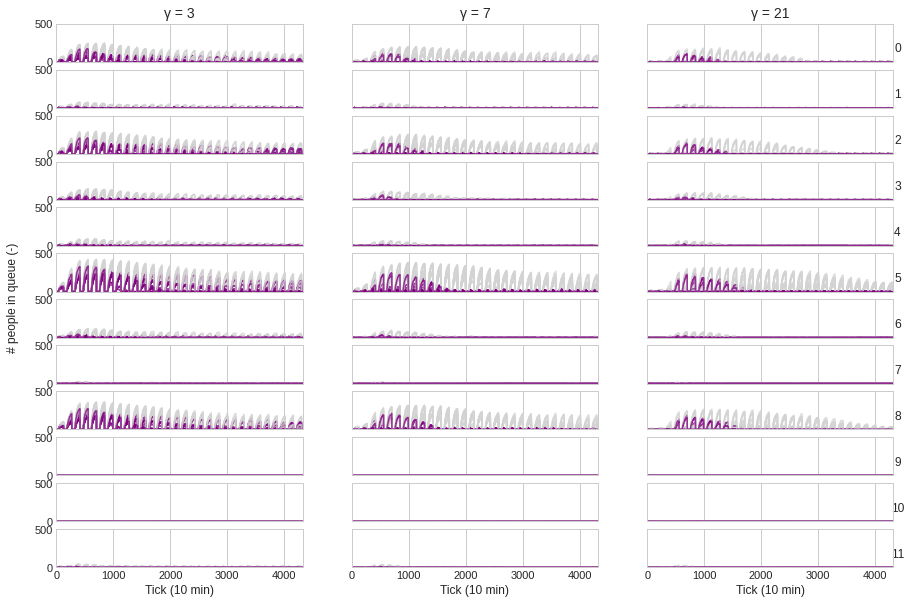

In [10]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.0)
plt.style.use("seaborn-whitegrid")

# Data


nb_facs = 12
nb_clusters = 3
fig, ax  = plt.subplots(nb_facs, nb_clusters,sharex=True, sharey=True,figsize=(15,10))

colors = {}
colors[6.0] = ['lightgrey','lightgrey']
colors[1] = ['chocolate','orange','lightgrey']
colors[7.8] = ['purple','plum','lightgrey']
colors[3] = ['darkolivegreen','yellowgreen','lightgrey']

for c in range(nb_clusters):
    for i in d[c]:
        
#         if input_vars.parallel_served_full[i] == 6.0:
        ind = input_vars.parallel_served_full[i]
        for f in range(nb_facs):
            ax[f,c].plot(x,data[data.o0==i].iloc[:,f+4],color=colors[ind][0],alpha=0.75)
            ax[f,c].set_xlim([0,4320])
            ax[f,c].set_ylim([0,500])
            ax[f,2].yaxis.set_label_position("right")
            ax[f,2].set_ylabel(f,rotation='horizontal',fontsize=12)
            ax[f,c].set_yticks([0,500])

            
    ax[0,c].set_title(labels[c],fontsize=14)
    ax[11,c].set_xlabel("Tick (10 min)")

fig.text(0.085, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=12)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

# fig.savefig("/home/daan/Desktop/allqueues_clustered.png")

plt.show()

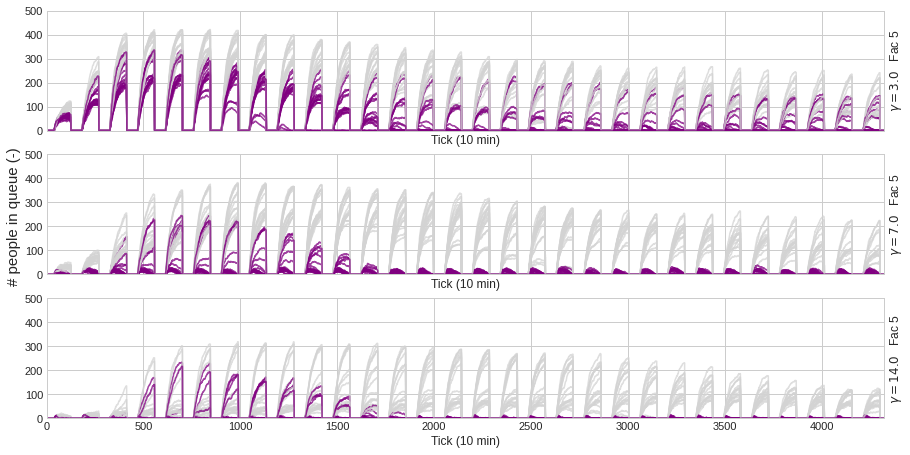

In [40]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

nb_facs = 1
nb_clusters = 3
fig, ax  = plt.subplots( nb_clusters,nb_facs,sharex=True, sharey=True,figsize=(15,7.5))#,gridspec_kw={'width_ratios': width_ratios})
f=5
for c in range(nb_clusters):
    for i in d[c]:
        
#         if input_vars.parallel_served_full[i] == 7.8:
        ind = input_vars.parallel_served_full[i]
#         for f in range(nb_facs):
        ax[c].plot(x,data[data.o0==i].iloc[:,f+4],color=colors[ind][0],alpha=0.75)
#             ax[c].plot(x,data[data.o0==i].iloc[:,f+3])
        ax[c].set_xlim([0,4320])
        ax[c].set_ylim([0,500])
        ax[c].yaxis.set_label_position("right")

        ax[c].set_ylabel("$\mathit{\gamma=%s}$   Fac 5"%(input_vars.gamma[i]),rotation='vertical',fontsize=12)
        ax[c].set_yticks(np.linspace(0,500,6))
#         ax[c].set_title(labels[c],fontsize=14)
    ax[c].set_xlabel("Tick (10 min)")

fig.text(0.095, 0.5, '# people in queue (-)', va='center', ha='center', rotation='vertical',fontsize=15)
# fig.text(0.5, 0.91, 'Number of people queueing; categorised per cluster, day 0-30', va='center', ha='center', rotation='horizontal',fontsize=16)

fig.savefig("/home/daan/Desktop/fac5queue_clustered.png")
print("")
plt.show()

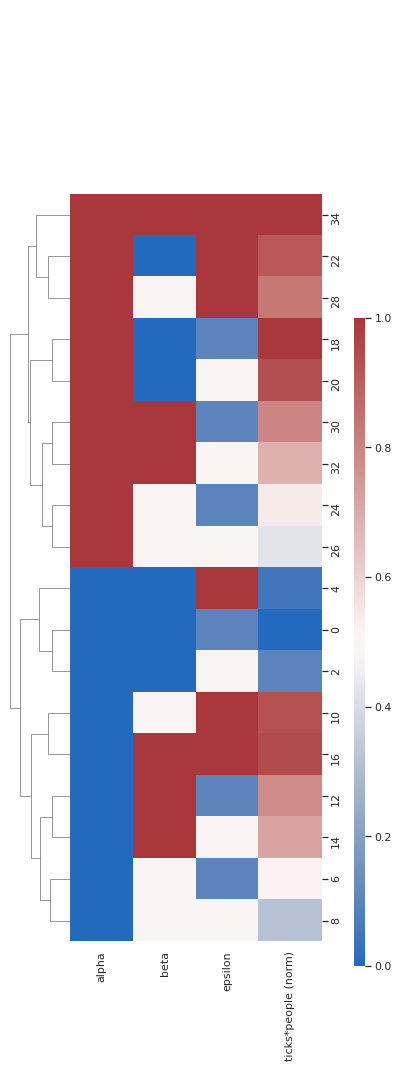

In [524]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==7.0].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data[data.o0==j].iloc[:,9]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

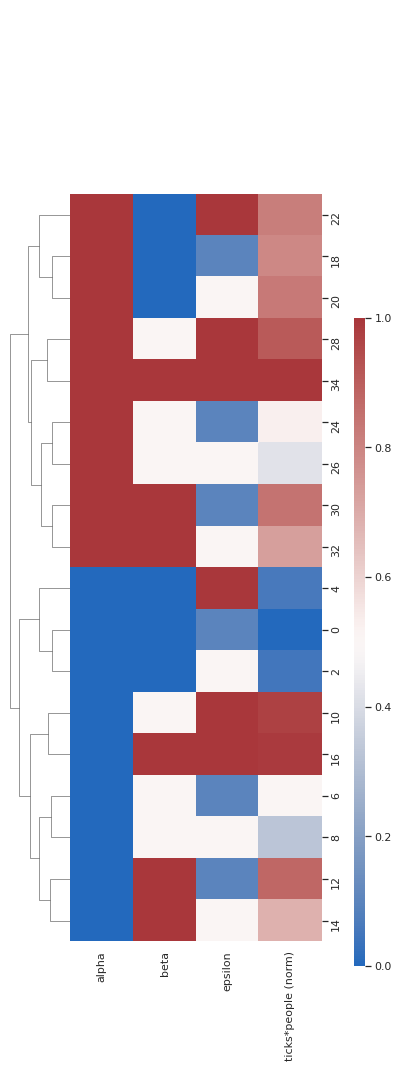

In [523]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
filtered_input_vars = input_vars[input_vars.gamma==7.0].reset_index()#.iloc[ d[0] ].reset_index()

for j in filtered_input_vars['index']:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(q_sum[data.o0==j]) )
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==6.0]

# filtered_input_vars = filtered_input_vars.drop(columns=["gamma"])# = 0#filtered_input_vars["gamma"]/30


filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")

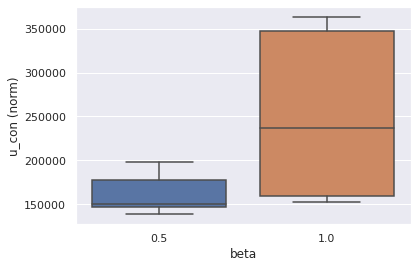

In [82]:
uc_endvals_dict = {}
uc_endvals_dict["u_con (norm)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()

for j in input_vars_batch.index:
    uc_endvals_dict["u_con (norm)"].append( np.sum(data_batch[data_batch.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.gamma==3]
input_vars_batch_filtered = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==7.8]

ax = sns.boxplot(x="beta", y="u_con (norm)", data=input_vars_batch_filtered)

## Food waste

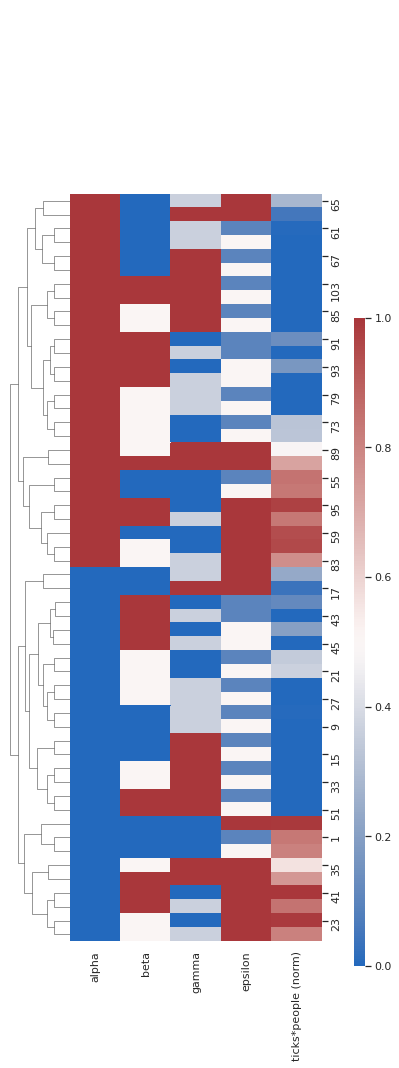

In [372]:
# Clustermap of gamma = 3, normalised last value (change index of d to get other values for gamma)
uc_endvals_dict = {}
uc_endvals_dict["ticks*people (norm)"] = list()
for j in input_vars.index:#d[0]:
    uc_endvals_dict["ticks*people (norm)"].append( np.sum(data.o2[data.o0==j]))#.iloc[:,3]))
uc_endvals_df = pd.DataFrame(uc_endvals_dict)

filtered_input_vars = input_vars.reset_index()#.iloc[ d[0] ].reset_index()
filtered_input_vars = pd.concat([filtered_input_vars,uc_endvals_df],axis=1)
filtered_input_vars=filtered_input_vars[filtered_input_vars.parallel_served_full==7.8]

filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"]) 


filtered_input_vars["ticks*people (norm)"] = normalise(filtered_input_vars["ticks*people (norm)"]) 

# filtered_input_vars["gamma"] = normalise(filtered_input_vars["gamma"])

sns.set(font_scale=1.0)
fig = sns.clustermap(filtered_input_vars.iloc[:,[7,8,9,10,13]],cbar_pos=(1.0, .1, .03, .6),figsize=(5,15),col_cluster=False,cmap='vlag')
# fig.savefig("/home/daan/Desktop/clustermap_unsatisfiedconsumption.png")